In [53]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import geopandas as gpd
import matplotlib.pyplot as plt
import country_converter as coco
import matplotlib.colors as mcolors

In [99]:
df_train = pd.read_csv("./dataset/train_preprocessed_v6.csv")
df_train['review_text'] = df_train['review_text'].apply(ast.literal_eval)

df_test = pd.read_csv("./dataset/test_preprocessed_v6.csv")
df_test['review_text'] = df_test['review_text'].apply(ast.literal_eval)

df_train_v4 = pd.read_csv("./dataset/train_preprocessed_v4.csv")
df_train_v4['review_text'] = df_train_v4['review_text'].apply(ast.literal_eval)

df_test_v4 = pd.read_csv("./dataset/test_preprocessed_v4.csv")
df_test_v4['review_text'] = df_test_v4['review_text'].apply(ast.literal_eval)

df_country = pd.read_csv('./dataset/country.csv')
df_city = pd.read_csv('./dataset/worldcities.csv')

In [88]:
df_train.head()

,Unnamed: 0.1,Unnamed: 0,hotel_name,hotel_location,review_id,review_date,review_text,review_language,review_rating,hotel_rating_mean,hotel_city,hotel_country
0,0,0,Cobblestone Inn Suites-eads,Eads US,3mcTZLLqVE5ztNyE,28-11-2015,"['new', 'hotel', 'great', 'staff', 'loved', 'i...",en,8.0,8.000000,Eads,US
1,1,1,DoubleTree by Hilton London Islington,London 9LA United Kingdom,7HCg4Hk7ZbpQY60X,29-12-2015,"['lovely', 'attentive', 'welcoming', 'staff', ...",en,10.0,8.770199,London 9LA,United Kingdom
2,2,2,citizenM Tower of London,London United Kingdom,yABlhfdJX4UlnNqA,08-09-2016,"['cozy', 'space', 'chill', 'myouch', 'variety'...",en,7.1,9.133295,London,United Kingdom
3,3,3,The Savoy,London United Kingdom,hS252WXcgeRVdch6,15-10-2011,"['hotel', 'ha', 'certainly', 'benefited', 'inv...",en,10.0,9.309445,London,United Kingdom
4,4,4,Millennium Gloucester Hotel London,,Fo44un6pn2M7XoVJ,23-10-2015,"['excellent', 'location', 'albert', 'hall', 'p...",en,10.0,7.646234,,None


# Tabular Data EDA

## review_language

### review_language unique category

In [3]:
df_train['review_language'].unique()

array(['en', 'da', 'es', 'it', 'fr', 'de', 'ca', 'pt', 'ro', 'af', 'tr',
       'hu', 'pl', 'ko', 'hr', 'nl', 'no', 'et', 'vi', 'cy', 'so', 'sl',
       'tl', 'sw', 'id', 'sv', 'fi', 'ja', 'lv', 'cs', 'sk', 'sq', 'fa',
       'ru', 'ar', 'lt', 'zh-cn', 'he', 'th'], dtype=object)

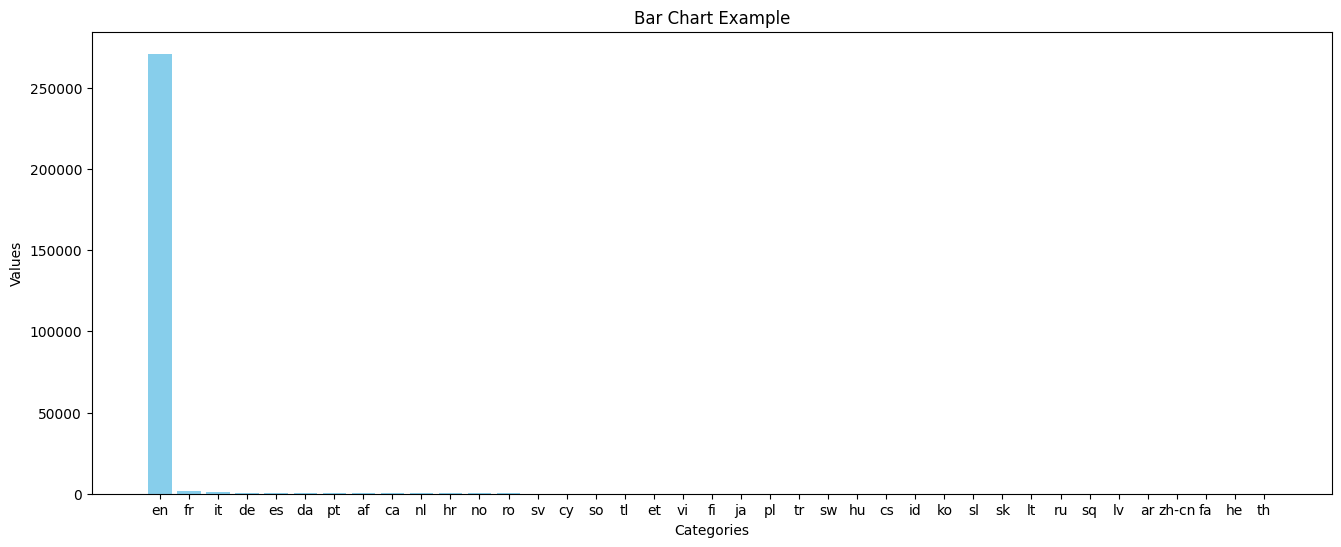

In [93]:
# Create a bar chart
def bar_chart_language(df):
    language_counts = df['review_language'].value_counts().reset_index()
    language_counts.columns = ['language', 'count']
    plt.figure(figsize=(16, 6))  # Optional: Adjust the figure size
    plt.bar(language_counts['language'], language_counts['count'], color='skyblue')  # Plot the bars
    plt.xlabel('Categories')  # X-axis label
    plt.ylabel('Values')  # Y-axis label
    plt.title('Bar Chart Example')  # Title for the chart
    plt.show()  # Display the chart

bar_chart_language(df_train)

## hotel_location

In [4]:
# Create a function to identify and split the country from location
def split_country(row):
    location = row['hotel_location']
    for country in df_country['value']:
        if country in location:
            return location.split(country)[0].strip(), country

    return location, None

# Fill NaN values in 'hotel_location' column with an empty string
df_train['hotel_location'].fillna('', inplace=True)
df_test['hotel_location'].fillna('', inplace=True)

# Apply the function to split 'Location' into 'City' and 'Country' columns
df_train[['hotel_city', 'hotel_country']] = df_train.apply(split_country, axis=1, result_type='expand')
df_test[['hotel_city', 'hotel_country']] = df_test.apply(split_country, axis=1, result_type='expand')

In [5]:
# # Create a function to identify and split the city from recent city
# def split_city(row):
#     location = row['hotel_city']
#     for city in df_city['city']:
#         if city in location:
#             return location.split(city)[0].strip(), city

#     return location, None
    
# # Fill NaN values in 'hotel_location' column with an empty string
# df_train['hotel_city'].fillna('', inplace=True)

# # Apply the function to split 'Location' into 'City' and 'Country' columns
# df_train[['hotel_city', 'dump']] = df_train.apply(split_city, axis=1, result_type='expand')
# df_train.drop('dump', axis = 1)

In [6]:
df_train.hotel_city.value_counts()

London           77570
                 38302
Barcelona        27195
Paris            24744
Amsterdam        24221
                 ...  
Santa Barbara        1
Rapid City           1
Cook                 1
Maumee               1
Ithaca               1
Name: hotel_city, Length: 716, dtype: int64

In [7]:
df_train.hotel_country.value_counts()

United Kingdom    140228
Spain              29929
France             25959
Austria            18853
Italy              18573
Netherlands        17258
US                  5037
Mexico               779
Switzerland          342
Panama               192
Nicaragua            186
India                  5
Chad                   2
Cuba                   1
Grenada                1
Name: hotel_country, dtype: int64

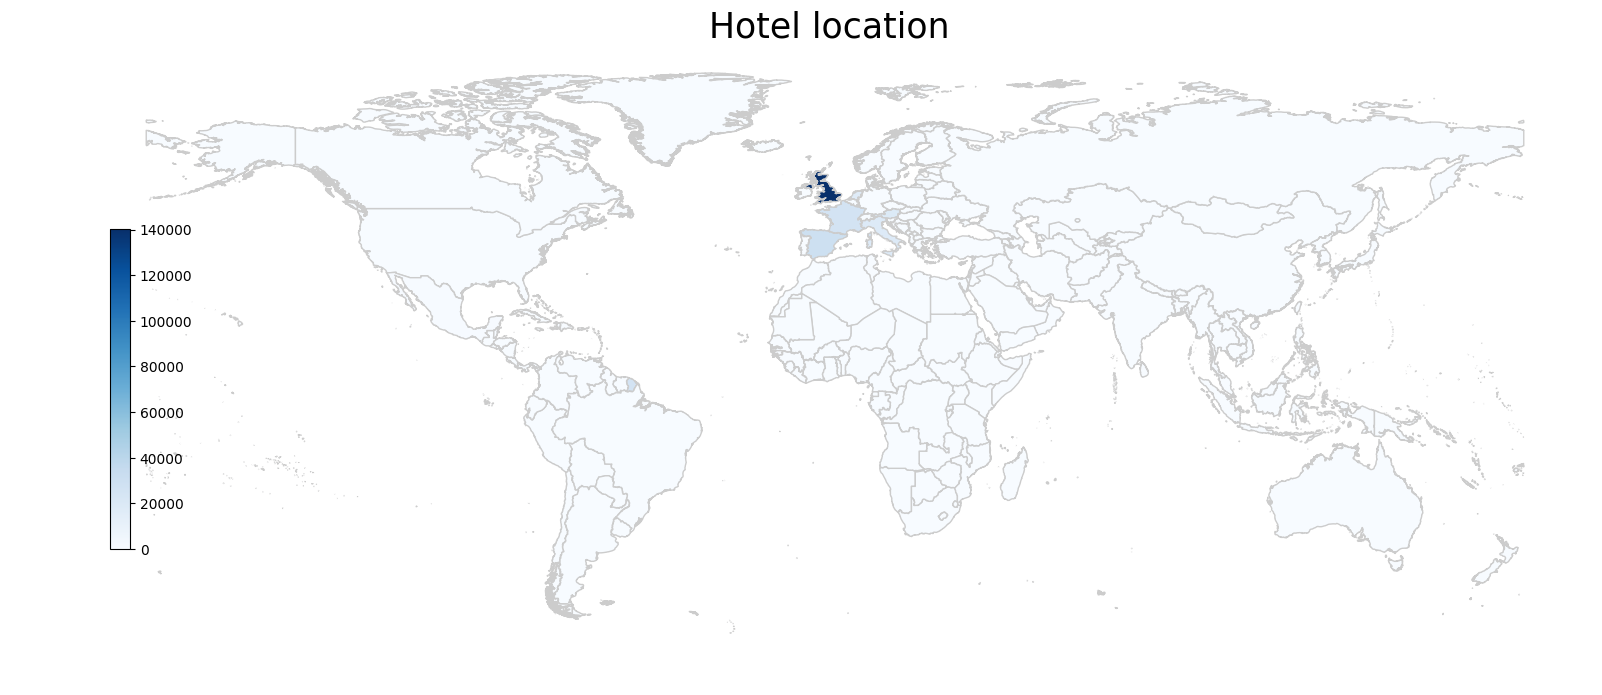

In [86]:
# Count occurrences of each country



def country_count_heatmap(df):
    SHAPEFILE = 'dataset/ne_10m_admin_0_countries.shp'
    geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
    geo_df.columns = ['country', 'country_code', 'geometry']
    country_count_df.loc[6,'country'] = 'United States of America'

    geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

    #geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

    # iso3_codes = geo_df['country'].to_list()
    # # Convert to iso3_codes
    # iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
    # # Add the list with iso2 codes to the dataframe
    # geo_df['iso2_code'] = iso2_codes_list
    # # There are some countries for which the converter could not find a country code. 
    # # We will drop these countries.
    # geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)
    
    country_counts = df['hotel_country'].value_counts().reset_index()
    country_counts.columns = ['country', 'count']

    
    # Merge country counts with world map data
    merged_df = pd.merge(left=geo_df,right=country_counts, how='left', on='country')
    merged_df = merged_df.fillna(0)
    
    # Print the map
    # Set the range for the choropleth
    title = 'Hotel location '
    col = 'count'
    source = ' '
    vmin = merged_df[col].min()
    vmax = merged_df[col].max()
    cmap = 'Blues'
    # Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(20, 8))
    # Remove the axis
    ax.axis('off')
    merged_df.plot(column=col, ax=ax, linewidth=1, cmap=cmap, edgecolor='0.8')
    # Add a title
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
    # Create an annotation for the data source
    ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
                verticalalignment='bottom', fontsize=10)
                
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
    # Empty array for the data range
    sm._A = []
    # Add the colorbar to the figure
    cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
    cbar = fig.colorbar(sm, cax=cbaxes)

country_count_heatmap(df_train)


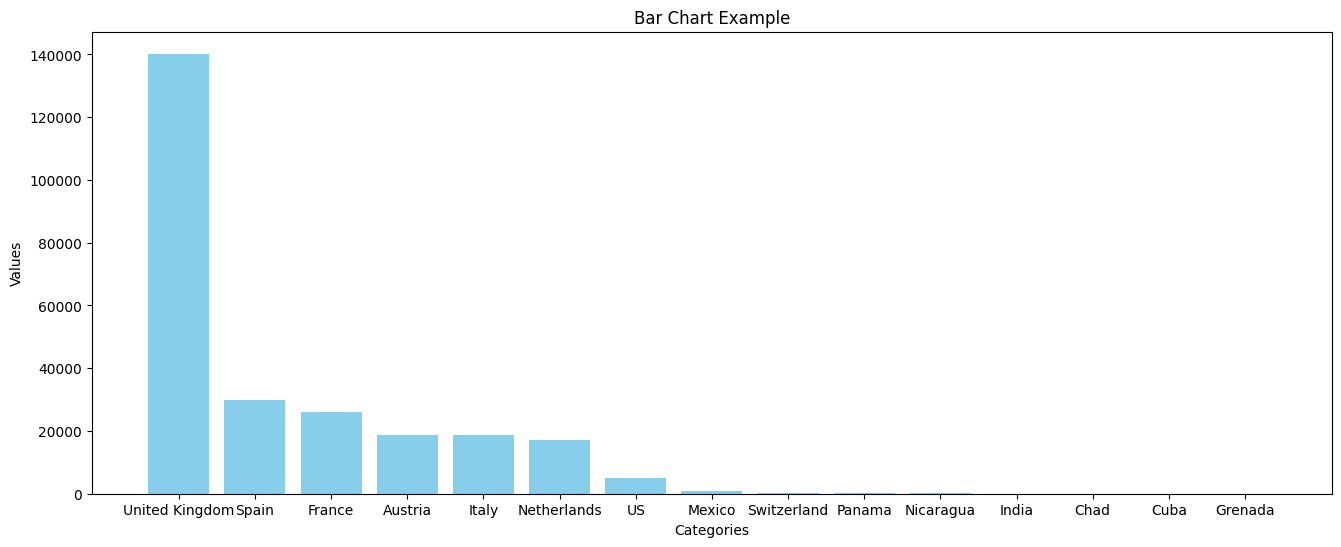

In [91]:
# Create a bar chart
def bar_chart_country(df):
    country_counts = df['hotel_country'].value_counts().reset_index()
    country_counts.columns = ['country', 'count']
    plt.figure(figsize=(16, 6))  # Optional: Adjust the figure size
    plt.bar(country_counts['country'], country_counts['count'], color='skyblue')  # Plot the bars
    plt.xlabel('Categories')  # X-axis label
    plt.ylabel('Values')  # Y-axis label
    plt.title('Bar Chart Example')  # Title for the chart
    plt.show()  # Display the chart

bar_chart_country(df_train)

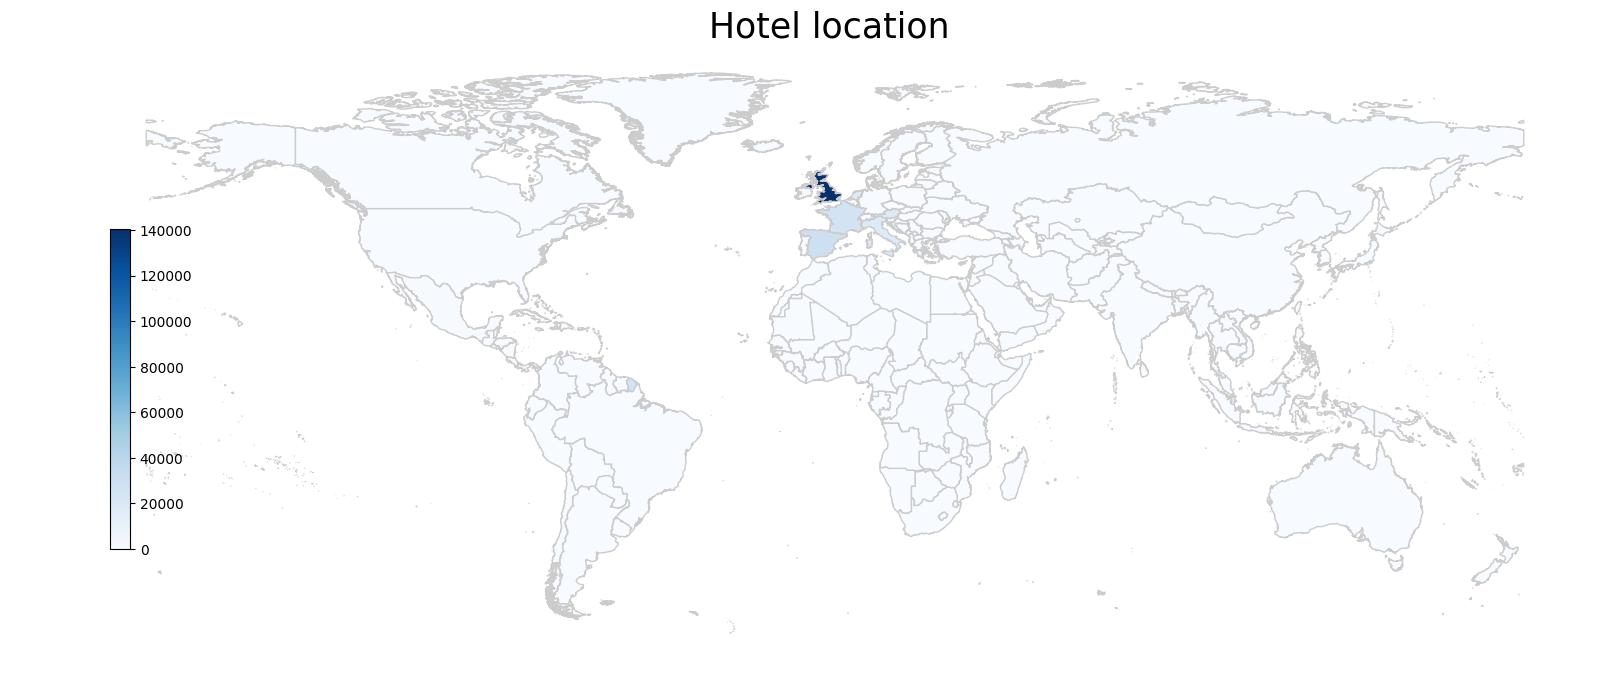

In [87]:
country_count_heatmap(df_test)

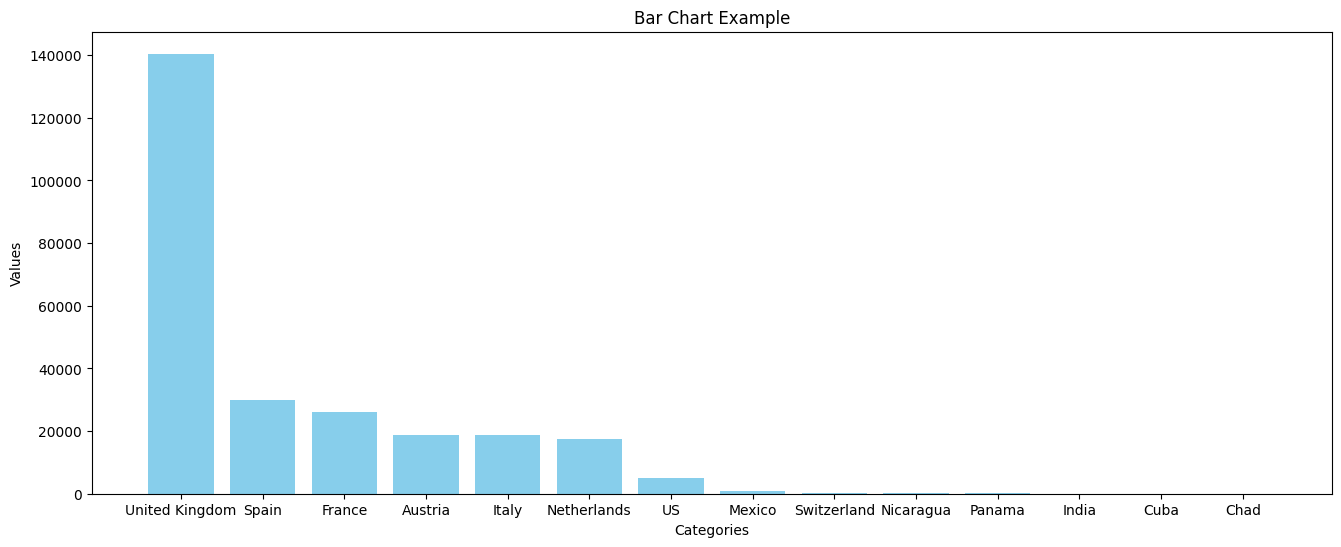

In [92]:
bar_chart_country(df_test)

# Text data EDA

## Wordcloud

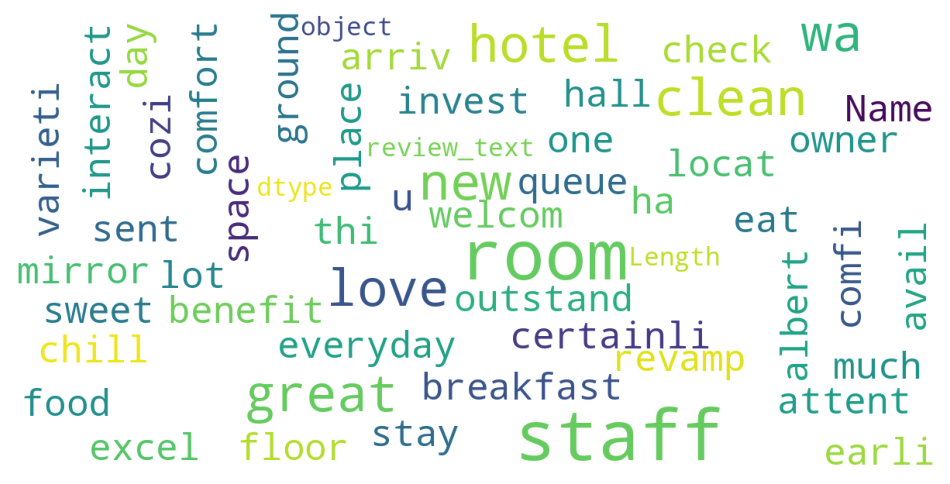

In [100]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_train_v4['review_text'])

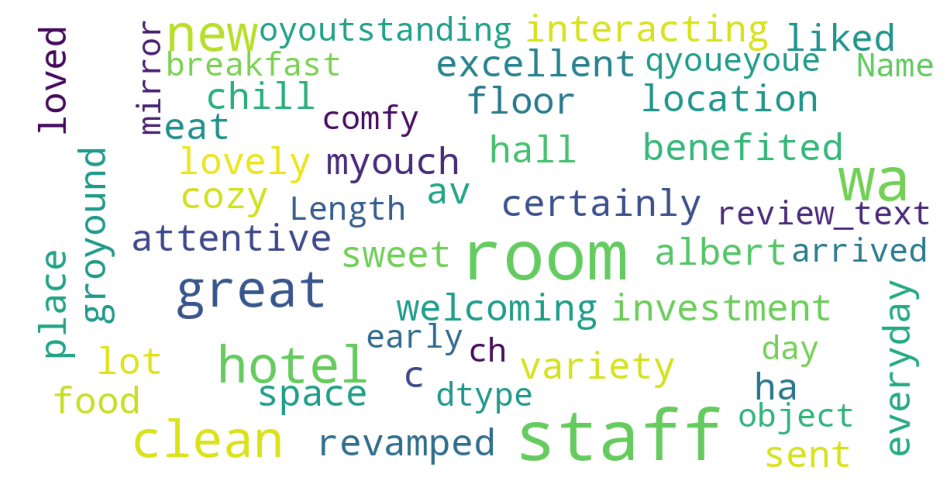

In [102]:
show_wordcloud(df_train['review_text'])